# Artificial Intelligence
# 464/664
# Assignment #3

## General Directions for this Assignment

00. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
01. Read the entire notebook before beginning your work, 
02. Output format should be exactly as requested, 
03. Each helper function should be preceeded by documentation (Markdown cell),
05. No comments in the code; anything worth mentioning should be included in the documentation,
06. Keep functions to 20 lines or less (including empty lines so do not add any),
08. Use descriptive variable names,
09. Functions should do only one thing,
10. Check submission deadline on Gradescope, 
11. Rename the file to Last_First_assignment_2, 
12. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
13. Do not submit any other files.


## Directions _not_ applicable for this Assignment:
* Do not use classes,
* Each helper function should be followed by three assert-style unit tests.


## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".

# Problem #1: Multiagent Systems

## The World

A `List of Lists` is used to represent the world. Cells marked as '⬛' are obstacles in the world and are not traversable.

In [1]:
world = [
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬛','⬛','⬛','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬛','⬛','⬛','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬛','⬛','⬛','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜']]

In [2]:
# A nicer view of the world, without commas and brackets
for row in world:
    print("".join(row))

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


## Robot

Our robot '🤖' starts at the bottom left and can either move up, down, left, or right. It's looking for the '❤️' in the world. 

In [3]:
MOVES = [(-1,0), (0,1), (1,0), (0,-1)] # Up Right Down Left

In [4]:
start = (len(world)-1, 0)

In [5]:
goal = (0, len(world)-1)

## Other Agents

There are four other agents in the world: '🚎', '🚎', '🚎', and '🚎'.

In [6]:
# Update the world with this information
world[start[0]][start[1]] = '🤖'
world[start[0]][start[1]+2] = '🚎'
world[start[0]][start[1]+4] = '🚎'
world[start[0]][start[1]+6] = '🚎'
world[start[0]][start[1]+8] = '🚎'
world[goal[0]][goal[1]] = '❤️'

In [7]:
# A nicer view of the world, without commas and brackets
for row in world:
    print("".join(row))

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜❤️
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🤖⬜🚎⬜🚎⬜🚎⬜🚎⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


## Problem #1


'🤖' is your robot from Assignment #1 and uses the A$^*$ search function to find the optimal path to goal. Each '🚎' has no such capability; all it can do is swarm. Each '🚎' uses Boids Rules (repulsion and attraction only) with another '🚎' and '🤖'. Implement this multiagent system consisting of an intelligent '🤖' robot and four '🚎' agents. 

* Our A$^*$ robot '🤖' does not use Boids Rule, but is the de-facto leader of the swarm since the '🚎' agents swarm with it. 

* Print out the resulting view of the world ('🤖', '🚎', '⬛', and '❤️' icons) **for each step** '🤖' takes on its way to '❤️'. (Assignment #1 only asked for the final output. This assignment asks for a print of the world after each step taken by '🤖'.)

* Use a repulsion range of 2 and a suitable attraction range that keeps the swarm together.

* '🚎' shouldn't leave the world

* '🚎' locations may need to be rounded when placed on the world for printing

In [8]:
import math
import copy
from heapq import heappush, heappop
from copy import deepcopy

<a id="display"></a>
## display

Print the world as a grid of characters.

* **arg_1** list: `world` - A 2D list where each sublist represents a row in the world, and each element in the sublist is a character representing part of the world.

**returns**

* **None**: This function does not return any value; it prints the world directly.


In [9]:
def display(world):
    for row in world:
        print("".join(row))
    print("\n")

In [10]:
assert display([['⬜', '⬜', '⬜'], ['⬜', '🤖', '⬜'], ['⬜', '⬜', '⬛']]) is None
assert display([['⬜', '⬜'], ['⬜', '❤️']]) is None
assert display([['⬛', '⬜'], ['⬜', '⬜'], ['🤖', '⬜']]) is None

⬜⬜⬜
⬜🤖⬜
⬜⬜⬛


⬜⬜
⬜❤️


⬛⬜
⬜⬜
🤖⬜




<a id="calculate_distance_squared"></a>
## calculate_distance_squared

Calculate the squared distance between two points.

* **arg_1** tuple: `(x1, y1)` - Coordinates of the first point.
* **arg_2** tuple: `(x2, y2)` - Coordinates of the second point.

**returns**

* **distance_squared** float: The squared distance between the two points.

In [11]:
def calculate_distance_squared(point_a, point_b):
    delta_x = point_a[0] - point_b[0]
    delta_y = point_a[1] - point_b[1]
    return delta_x**2 + delta_y**2

In [12]:
assert calculate_distance_squared((0, 0), (3, 4)) == 25  
assert calculate_distance_squared((1, 1), (1, 1)) == 0  
assert calculate_distance_squared((1, 2), (4, 6)) == 25  


<a id="find_valid_neighbors"></a>
## find_valid_neighbors

Get valid neighboring positions for A* search, sorted by heuristic value.

* **arg_1** list: `grid` - A 2D list representing the world.
* **arg_2** tuple: `current_pos` - The current position as (x, y).
* **arg_3** list: `possible_moves` - A list of possible moves.
* **arg_4** set: `visited_positions` - A set of explored positions.
* **arg_5** tuple: `target_pos` - The target position as (x, y).

**returns**

* **list**: A list of valid neighboring positions sorted by their heuristic value.

In [13]:
def find_valid_neighbors(grid, current_pos, possible_moves, visited_positions, target_pos):
    neighbors = []
    for move in possible_moves:
        next_pos = (current_pos[0] + move[0], current_pos[1] + move[1])
        if (0 <= next_pos[0] < len(grid) and
                0 <= next_pos[1] < len(grid[0]) and
                grid[next_pos[0]][next_pos[1]] != '⬛' and
                next_pos not in visited_positions):
            heuristic_value = calculate_distance_squared(next_pos, target_pos)
            neighbors.append((next_pos, heuristic_value))
    neighbors.sort(key=lambda x: x[1])
    return [neighbor[0] for neighbor in neighbors]

In [14]:
grid = [
    ['⬜', '⬜', '⬛', '⬜'],
    ['⬜', '⬜', '⬜', '⬜'],
    ['⬛', '⬜', '⬜', '⬛'],
    ['⬜', '⬜', '⬜', '⬜']
]
possible_moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]
current_pos = (1, 1)
visited = [(1, 0), (0, 1)]
target = (3, 3)
expected_neighbors = [(1, 2), (2, 1)]
neighbors = find_valid_neighbors(grid, current_pos, possible_moves, visited, target)
assert neighbors == expected_neighbors, f"Expected {expected_neighbors}, but got {neighbors}"
current_pos_no_neighbors = (0, 0)
visited_no_neighbors = [(0, 1), (1, 0)]
target_no_neighbors = (3, 3)
assert find_valid_neighbors(grid, current_pos_no_neighbors, possible_moves, visited_no_neighbors, target_no_neighbors) == [], "Expected no valid neighbors"
current_pos_edge = (3, 0)
visited_edge = []
target_edge = (2, 2)
expected_neighbors_edge = [(3, 1)]
neighbors_edge = find_valid_neighbors(grid, current_pos_edge, possible_moves, visited_edge, target_edge)
assert neighbors_edge == expected_neighbors_edge, f"Expected {expected_neighbors_edge}, but got {neighbors_edge}"


<a id="search"></a>
## search

Recursive search function to explore the frontier in the A* algorithm.

* **arg_1** list: `front` - The priority queue containing nodes to explore.
* **arg_2** list: `grid` - The current state of the environment.
* **arg_3** set: `explored` - Set of positions that have already been explored.
* **arg_4** dict: `cost` - Map of costs to reach each position.
* **arg_5** tuple: `target` - The target position as (x, y).
* **arg_6** list: `moves` - A list of possible moves.

**returns**

* **list**: The path from start to goal, including both positions, or `None` if no path exists.


In [15]:
def search(front, grid, explored, cost, target, moves):
    if not front:
        return None
    _, curr, path = heappop(front)
    if curr == target:
        return path + [curr]
    for neigh in find_valid_neighbors(grid, curr, moves, explored, target):
        total_cost = cost[curr] + 1
        if neigh not in cost or total_cost < cost[neigh]:
            cost[neigh] = total_cost
            heappush(front, (total_cost + calculate_distance_squared(neigh, target), neigh, path + [curr]))
            explored.add(neigh)
    return search(front, grid, explored, cost, target, moves)

In [16]:
grid = [
    ['⬜', '⬜', '⬛', '⬜'],
    ['⬜', '⬜', '⬜', '⬜'],
    ['⬛', '⬜', '⬜', '⬛'],
    ['⬜', '⬜', '⬜', '⬜']
]
moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]
front = []
heappush(front, (0, (0, 0), []))
explored = set()
cost = {(0, 0): 0}
target = (3, 3)
path = search(front, grid, explored, cost, target, moves)
expected_path = [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (3, 2), (3, 3)]
assert path == expected_path, f"Expected path {expected_path}, but got {path}"
grid_no_path = [
    ['⬜', '⬛', '⬜'],
    ['⬛', '⬛', '⬜'],
    ['⬜', '⬜', '⬜']
]
front_no_path = []
heappush(front_no_path, (0, (0, 0), []))
explored_no_path = set()
cost_no_path = {(0, 0): 0}
target_no_path = (2, 2)
assert search(front_no_path, grid_no_path, explored_no_path, cost_no_path, target_no_path, moves) is None, "Expected no path found"
front_same = []
heappush(front_same, (0, (0, 0), []))
explored_same = set()
cost_same = {(0, 0): 0}
target_same = (0, 0)
assert search(front_same, grid, explored_same, cost_same, target_same, moves) == [(0, 0)], "Expected path to be just the start position"

<a id="a_star"></a>

a_star
Perform A* search algorithm to find the path from start to goal.

arg_1 list: env - A 2D list representing the world.
arg_2 tuple: start - The starting position as (x, y).
arg_3 tuple: target - The target position as (x, y).
arg_4 list: moves - A list of possible moves.
returns

list: The path from start to goal, including both positions, or None if no path exists.

In [17]:
def a_star(env, start, target, moves):
    grid = deepcopy(env)
    front = []
    heappush(front, (0, start, []))
    explored = {start}
    cost = {start: 0}
    return search(front, grid, explored, cost, target, moves)

In [18]:
env = [
    ['⬜', '⬜', '⬛', '⬜'],
    ['⬛', '⬜', '⬛', '⬜'],
    ['⬜', '⬜', '⬜', '⬛'],
    ['⬜', '⬛', '⬜', '⬜']
]
moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]
start = (0, 0)
target = (3, 3)
expected_path = [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3)]
path = a_star(env, start, target, moves)
assert path == expected_path, f"Expected {expected_path}, but got {path}"

env_no_path = [
    ['⬜', '⬛', '⬜'],
    ['⬛', '⬛', '⬜'],
    ['⬜', '⬛', '⬜']
]
start_no_path = (0, 0)  # Correctly defined tuple
target_no_path = (2, 2)
assert a_star(env_no_path, start_no_path, target_no_path, moves) is None, "Expected no path found"
assert a_star(env, start, start, moves) == [start], "Expected path to be just the start position"


### 1. `calc_separation`

<a id="calc_separation"></a>
## calc_separation

Calculate the separation vector for a given agent based on the positions of nearby agents.

* **arg_1** tuple: `pos` - The position of the agent as (x, y).
* **arg_2** list: `agents` - A list of positions of other agents in the swarm.
* **arg_3** float: `rep_range` - The range within which agents repel each other.

**returns**

* **list**: A separation vector as [x, y] that represents the direction to move away from nearby agents.


In [19]:
def calc_separation(pos, agents, rep_range):
    sep = [0.0, 0.0]
    count = 0
    for other in agents:
        if pos == other:
            continue
        dx, dy = pos[0] - other[0], pos[1] - other[1]
        dist = math.hypot(dx, dy)
        if 0 < dist < rep_range:
            sep[0] += dx / dist
            sep[1] += dy / dist
            count += 1
    return [s / count if count > 0 else 0.0 for s in sep]

In [20]:
assert calc_separation((0, 0), [(3, 3), (4, 4), (5, 5)], 1.0) == [0.0, 0.0]
assert calc_separation((0, 0), [(2,2), (4, 4), (5, 5)], 2.0) == [0.0, 0.0]
assert calc_separation((0, 0), [(2,2), (4, 4), (5, 5)], 1.0) == [0.0, 0.0]

### 2. `calc_cohesion`

<a id="calc_cohesion"></a>
## calc_cohesion

Calculate the cohesion vector for a given agent based on the positions of nearby agents.

* **arg_1** tuple: `pos` - The position of the agent as (x, y).
* **arg_2** list: `agents` - A list of positions of other agents in the swarm.
* **arg_3** float: `att_range` - The range within which agents are attracted to each other.

**returns**

* **list**: A cohesion vector as [x, y] that indicates the direction towards the average position of nearby agents.

In [21]:
def calc_cohesion(pos, agents, att_range):
    coh = [0.0, 0.0]
    count = 0
    for other in agents:
        if pos == other:
            continue
        dx, dy = pos[0] - other[0], pos[1] - other[1]
        dist = math.hypot(dx, dy)
        if dist < att_range:
            coh[0] += other[0]
            coh[1] += other[1]
            count += 1
    return [(coh[0] / count - pos[0]) if count > 0 else 0.0, 
            (coh[1] / count - pos[1]) if count > 0 else 0.0]

In [22]:
assert calc_cohesion((2, 2), [(1, 1), (3, 3), (4, 4)], 3.0)
assert calc_cohesion((0, 0), [(1, 1), (2, 2), (3, 3)], 5.0)
assert calc_cohesion((3, 3), [(1, 1), (4, 4)], 1.5)

### 3. `avoid_obs`

<a id="avoid_obs"></a>
## avoid_obs

Check if the new position collides with an obstacle and returns the position accordingly.

* **arg_1** float: `nx` - The new x-coordinate of the agent.
* **arg_2** float: `ny` - The new y-coordinate of the agent.
* **arg_3** list: `world` - A 2D list representing the environment with potential obstacles.

**returns**

* **tuple**: The (x, y) coordinates, potentially unchanged if an obstacle is present at the new position.

-

In [23]:
def avoid_obs(nx, ny, world):
    if world[int(round(nx))][int(round(ny))] == '⬛':
        return nx, ny
    return nx, ny

In [24]:
assert avoid_obs(0, 0, world) == (0, 0)              
assert avoid_obs(1, 2, world) == (1, 2)             
assert avoid_obs(0, 2, world) == (0, 2)            


### 4. `update_pos`

<a id="update_pos"></a>
## update_pos

Update the position of an agent based on its separation and cohesion vectors.

* **arg_1** tuple: `pos` - The current position of the agent as (x, y).
* **arg_2** list: `sep` - The separation vector as [x, y].
* **arg_3** list: `coh` - The cohesion vector as [x, y].

**returns**

* **tuple**: The updated position of the agent as (new_x, new_y) after applying movement and obstacle avoidance.

In [25]:
def update_pos(pos, sep, coh):
    mx = weight_sep * sep[0] + weight_coh * coh[0]
    my = weight_sep * sep[1] + weight_coh * coh[1]
    nx = pos[0] + mx
    ny = pos[1] + my
    nx = max(0, min(len(world) - 1, nx))
    ny = max(0, min(len(world[0]) - 1, ny))
    return avoid_obs(nx, ny, world)

In [26]:
weight_sep = 1.5
weight_coh = 1.0
world = [['⬜', '⬜', '⬜', '⬜'], ['⬜', '⬛', '⬜', '⬜'], ['⬜', '⬜', '⬜', '⬜'], ['⬜', '⬜', '⬜', '⬜']]
assert update_pos((1, 1), [-1, 0], [0, 1]) == (0, 2), "Expected (0, 2)"
assert update_pos((3, 3), [0, 0], [1, 1]) == (3, 3), "Expected (3, 3)"
assert update_pos((2, 2), [2, 0], [0, -2]) == (3, 0), "Expected (3, 0)"

### 5. `update`

<a id="update"></a>
## update

Update the positions of all agents in the swarm based on the Boids algorithm.

* **arg_1** list: `positions` - A list of current positions of agents in the swarm.
* **arg_2** tuple: `robot` - The position of the robot as (x, y).

**returns**

* **list**: A list of new positions for all agents after applying separation, cohesion, and obstacle avoidance rules.

In [27]:
def update(positions, robot):
    new_pos = []
    agents = positions + [robot]
    for pos in positions:
        sep = calc_separation(pos, agents, rep_range)
        coh = calc_cohesion(pos, agents, att_range)
        new_pos.append(update_pos(pos, sep, coh))
    return new_pos

In [28]:
positions = [(0, 0), (2, 2)]
robot = (1, 1)
rep_range = 2.0
att_range = 3.0
new_positions = update(positions, robot)
assert new_positions != positions, "Expected new positions to be different from original positions."
assert len(new_positions) == len(positions), "Expected the number of new positions to match the number of original positions."
assert all(isinstance(pos, tuple) and len(pos) == 2 for pos in new_positions), "Expected all new positions to be tuples of length 2."

### init_swarm
Initialize the swarm positions based on a starting position.

**arg_1** tuple: `st` - Starting coordinates as (x, y).  
**arg_2** int: `space` - Space between agents in the swarm (default is 2).  
**arg_3** int: `cnt` - Number of agents in the swarm (default is 4).  

**returns**  
list: A list of tuples representing the positions of the swarm agents.


In [29]:
def init_swarm(st, space=2, cnt=4):
    return [(st[0], st[1] + i * space) for i in range(cnt)]

In [30]:
start = (0, 0)
assert init_swarm(start) == [(0, 0), (0, 2), (0, 4), (0, 6)], "Expected swarm positions to be [(0, 0), (0, 2), (0, 4), (0, 6)]"
assert init_swarm((1, 1), 1, 3) == [(1, 1), (1, 2), (1, 3)], "Expected swarm positions to be [(1, 1), (1, 2), (1, 3)]"
assert init_swarm((2, 2), space=3, cnt=2) == [(2, 2), (2, 5)], "Expected swarm positions to be [(2, 2), (2, 5)]"


### update_world
Update the world grid by placing swarm agents.

**arg_1** list: `w` - The world grid represented as a 2D list.  
**arg_2** list: `swarm` - A list of tuples representing the positions of the swarm agents.  

**returns**  
None: Modifies the world grid in place.

In [31]:
def update_world(w, swarm):
    for p in swarm:
        w[p[0]][p[1]] = '🚎'

In [32]:
world = [['⬜', '⬜', '⬜'], ['⬜', '⬜', '⬜'], ['⬜', '⬜', '⬜']]
swarm_positions = [(0, 0), (1, 1), (2, 2)]
update_world(world, swarm_positions)
assert world == [['🚎', '⬜', '⬜'], ['⬜', '🚎', '⬜'], ['⬜', '⬜', '🚎']], "Expected specific positions in the world to be updated with the swarm."

world = [['⬜', '⬜'], ['⬜', '⬜']]
swarm_positions = [(1, 1), (0, 0)]
update_world(world, swarm_positions)
assert world == [['🚎', '⬜'], ['⬜', '🚎']], "Expected specific positions in the world to be updated with the swarm."

world = [['⬜']]
swarm_positions = []
update_world(world, swarm_positions)
assert world == [['⬜']], "Expected no changes to the world when swarm positions are empty."

### clear_positions
Clear old positions of agents from the world grid.

**arg_1** list: `w` - The world grid represented as a 2D list.  
**arg_2** str: `agent` - The symbol representing the agent to be cleared (default is '🚎').  
**arg_3** str: `empty` - The symbol to replace the cleared agent with (default is '⬜').  

**returns**  
None: Modifies the world grid in place.

In [33]:
def clear_positions(w, agent='🚎', empty='⬜'):
    for r in range(len(w)):
        for c in range(len(w[0])):
            if w[r][c] == agent:
                w[r][c] = empty

In [34]:
world = [['🚎', '⬜', '⬜'], ['⬜', '🚎', '⬜'], ['⬜', '⬜', '🚎']]
clear_positions(world)
assert world == [['⬜', '⬜', '⬜'], ['⬜', '⬜', '⬜'], ['⬜', '⬜', '⬜']], "Expected all agent positions to be cleared to empty."

world = [['🚎', '🚎'], ['⬜', '⬜']]
clear_positions(world)
assert world == [['⬜', '⬜'], ['⬜', '⬜']], "Expected all agent positions to be cleared to empty."

world = [['⬜', '⬜'], ['⬜', '⬜']]
clear_positions(world)
assert world == [['⬜', '⬜'], ['⬜', '⬜']], "Expected no changes to the world when there are no agents."


### place_agents
Place swarm agents on the world grid, avoiding obstacles and overlaps.

**arg_1** list: `w` - The world grid represented as a 2D list.  
**arg_2** list: `swarm` - A list of tuples representing the positions of the swarm agents.  

**returns**  
None: Modifies the world grid in place.


In [35]:
def place_agents(w, swarm):
    placed = set()
    for p in swarm:
        x, y = int(round(p[0])), int(round(p[1]))
        if w[x][y] in ['⬛', '❤️']:
            continue
        if (x, y) in placed:
            continue
        w[x][y] = '🚎'
        placed.add((x, y))

In [36]:

world = [
    ['⬜', '⬜', '⬛', '⬜'],
    ['⬜', '⬜', '⬜', '⬜'],
    ['⬛', '⬜', '⬜', '⬜'],
    ['⬜', '⬜', '⬜', '⬜']
]
swarm = [(0, 0), (1, 1), (2, 2)]
place_agents(world, swarm)
assert world[0][0] == '🚎', "Expected agent to be placed at (0, 0)"
assert world[1][0] == '⬜', "Expected no agent to be placed at (1, 0) since it's empty"
assert world[2][0] == '⬛', "Expected no agent to be placed at (2, 0) since it's an obstacle"


### run_simulation
Run the simulation loop for the robot and swarm agents.

**arg_1** list: `w` - The world grid represented as a 2D list.  
**arg_2** list: `path` - The path for the robot to follow.  
**arg_3** tuple: `robot_start` - Starting position of the robot as (x, y).  
**arg_4** list: `swarm` - A list of tuples representing the positions of the swarm agents.  

**returns**  
None: Runs the simulation and prints the world at each step.

In [37]:
def run_simulation(w, path, robot_start, swarm):
    robot_pos = robot_start
    for i in range(1, len(path)):
        old_pos = robot_pos
        robot_pos = path[i]
        w[old_pos[0]][old_pos[1]] = '⬜'
        w[robot_pos[0]][robot_pos[1]] = '🤖'
        swarm = update(swarm, (float(robot_pos[0]), float(robot_pos[1])))
        clear_positions(w)
        place_agents(w, swarm)
        print(f"Step {i}:")
        display(w)
        if robot_pos == goal:
            print("🤖 reached the goal!")
            break

In [38]:
world = [
    ['⬜', '⬜', '⬜', '⬜'],
    ['⬜', '⬜', '⬜', '⬜'],
    ['⬜', '⬜', '⬜', '⬜'],
    ['⬜', '⬜', '⬜', '⬜']
]
path = [(0, 0), (0, 1), (1, 1), (1, 2)]
robot_start = (0, 0)
swarm = [(1, 0), (2, 1), (3, 2)]
run_simulation(world, path, robot_start, swarm)
assert world[1][2] == '🤖', "Expected robot to be at (1, 2)"  
assert world[2][0] == '🚎', "Expected an agent to be at (1, 1)"
assert world[0][0] == '⬜', "Expected old robot position (0, 0) to be empty"

Step 1:
⬜🤖⬜⬜
⬜🚎⬜⬜
🚎⬜⬜⬜
⬜⬜🚎⬜


Step 2:
⬜⬜⬜⬜
⬜🤖⬜⬜
🚎🚎⬜⬜
⬜⬜🚎⬜


Step 3:
⬜⬜⬜⬜
⬜⬜🤖⬜
🚎🚎⬜⬜
⬜⬜🚎⬜




Grid World Initialization
Overview
This section initializes a grid world environment where a robot and a goal are placed within a defined 21x21 grid. The grid contains walkable spaces and obstacles.

Grid Structure
Grid Size: The grid is a 21x21 2D array, with each cell initially set to ⬜, representing an open space.

In [48]:
world = [['⬜' for _ in range(21)] for _ in range(21)]
for i in range(9, 12):
    for j in range(9, 12):
        world[i][j] = '⬛'
start = (20, 0)
goal = (0, 20)
world[start[0]][start[1]] = '🤖'
world[goal[0]][goal[1]] = '❤️'

Simulation of Swarm Agents in a Grid World
Overview
This simulation involves swarm agents navigating within a defined grid world. The agents aim to avoid each other while maintaining cohesion and moving toward a specified goal.

Components
World Grid: A 2D grid representing the environment where agents operate.

Agents: Represented as 🚎, these swarm agents dynamically update their positions based on separation and cohesion behaviors.

Robot: Represented as 🤖, this agent moves along a calculated path toward a goal.


In [49]:
swarm = init_swarm(start)
update_world(world, swarm)
path = a_star(world, start, goal, MOVES)
if not path:
    print("No path found!")
    exit()
swarm = [(float(x), float(y)) for x, y in swarm]
rep_range = 2.0
att_range = 7
weight_sep = 1.6
weight_coh = 1.1
run_simulation(world, path, start, swarm)

Step 1:
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜❤️
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🤖⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜🚎🚎🚎⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


Step 2:
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜❤️
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜🤖⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜🚎🚎🚎⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


Step 3:
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜❤️
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜

# Problem #2: Game Theory

We are designing an experiment where two players employ the *Best Response with Inertia* algorithm against each other.

## Best Response with Inertia Algorithm

Here is the outline of the algorithm for each player:


```
On day zero, play a random action

On day t, do one of two things:

    * With high probability, play the best response to what your opponent did yesterday, or
    * With low probability, be lazy and just do what you did yesterday.
```

## Game

The particular 2x2 game being played is the Stag-Hunt game, with the matrix:


|  | | |
|---|---|---|
|  | S | H |
| S | 3, 3 | 0, 2 |
| H | 2, 0 | 2, 2 |


Player 1 (P1) is the `row` player; Player 2 (P2) is the `col` player.

In [41]:
import random
import matplotlib.pyplot as plt

In [42]:
# The actions available to each player. Don't modify. 
actions_P1 = ['S', 'H']
actions_P2 = ['S', 'H']

# Store the history. Don't modify. 
history_P1_action, history_P1_utility = [], []
history_P2_action, history_P2_utility = [], []

<a id="get_utility"></a>
## get_utility

This function takes a joint action tuple and returns the utility for each player, packaged as a tuple. It is hardcoded for the Stag-Hunt game described above.

* **a** Tuple: joint action. a could be ('S', 'H'), for instance, which would signify that P1 has chosen to do 'S' and P2 has chosen to do 'H'.


**returns** 

* **utility** Tuple: the utility for each player as (utility of P1, utility of P2). For example, if the input is ('S', 'H'), the returned value is (0, 2) -- 0 for P1, 2 for P2. 

In [43]:
def get_utility(a):
    if a[0] == 'S' and a[1] == 'S':
        return (3, 3)
    elif a[0] == 'S' and a[1] == 'H':
        return (0, 2)
    elif a[0] == 'H' and a[1] == 'S':
        return (2, 0)
    elif a[0] == 'H' and a[1] == 'H':
        return (2, 2)

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <p>
        TODO: Help players pick actions based on the <i>Best Response with inertia</i> algorithm described above (instead of just picking 'S' like they are now). 
    </p>
</div>

<a id="run_experiment"></a>
## run_experiment

This functions runs an experiment where two players play the Stag-Hunt game using the Best Response with Inertia algorithm.

* **num_trials** Int: The number of trials to run
* **num_days** Int: The number of days in each trial
* **debug** Bool: If set to True, statements are printed out


**returns** 

None

In [44]:
def run_experiment(num_trials, num_days, debug=True):
    if debug: print(f"Trial\tDay\tP1\tP2\n--------------------------")
    for trial in range(num_trials):  
        if debug: print(f"--------------------------")
        for day in range(num_days):
            
            # FIX 
            # Player should pick an action using the algorithm
            # Use 0.75 as stand-in for "high probability" 
            
            hp = 0.75
            if day == 0:
                action_P1, action_P2 = random.choice(actions_P1), random.choice(actions_P2)
            else:
                y = (trial * num_days) + day - 1
                action_P1 = history_P2_action[y] if random.random() <= hp else history_P1_action[y]
                action_P2 = history_P1_action[y] if random.random() <= hp else history_P2_action[y]
                
            # Don't modify below:
            utility_P1, utility_P2 = get_utility(tuple((action_P1, action_P2)))
            history_P1_action.append(action_P1)
            history_P2_action.append(action_P2)
            history_P1_utility.append(utility_P1)
            history_P2_utility.append(utility_P2)
            if debug: print(f"{trial}\t{day}\t{action_P1}\t{action_P2}")

In [45]:
# Parameters. Don't modify. Not even debug flag. 
run_experiment(num_trials=20, num_days=10, debug=True)

Trial	Day	P1	P2
--------------------------
--------------------------
0	0	H	H
0	1	H	H
0	2	H	H
0	3	H	H
0	4	H	H
0	5	H	H
0	6	H	H
0	7	H	H
0	8	H	H
0	9	H	H
--------------------------
1	0	S	S
1	1	S	S
1	2	S	S
1	3	S	S
1	4	S	S
1	5	S	S
1	6	S	S
1	7	S	S
1	8	S	S
1	9	S	S
--------------------------
2	0	H	H
2	1	H	H
2	2	H	H
2	3	H	H
2	4	H	H
2	5	H	H
2	6	H	H
2	7	H	H
2	8	H	H
2	9	H	H
--------------------------
3	0	H	S
3	1	H	H
3	2	H	H
3	3	H	H
3	4	H	H
3	5	H	H
3	6	H	H
3	7	H	H
3	8	H	H
3	9	H	H
--------------------------
4	0	H	H
4	1	H	H
4	2	H	H
4	3	H	H
4	4	H	H
4	5	H	H
4	6	H	H
4	7	H	H
4	8	H	H
4	9	H	H
--------------------------
5	0	S	S
5	1	S	S
5	2	S	S
5	3	S	S
5	4	S	S
5	5	S	S
5	6	S	S
5	7	S	S
5	8	S	S
5	9	S	S
--------------------------
6	0	S	S
6	1	S	S
6	2	S	S
6	3	S	S
6	4	S	S
6	5	S	S
6	6	S	S
6	7	S	S
6	8	S	S
6	9	S	S
--------------------------
7	0	S	H
7	1	H	S
7	2	S	S
7	3	S	S
7	4	S	S
7	5	S	S
7	6	S	S
7	7	S	S
7	8	S	S
7	9	S	S
--------------------------
8	0	S	H
8	1	H	S
8	2	S	H
8	3	H	S
8	4	S	H
8	5	H	S
8	6	S	S
8	7	S	S
8	8	S	S
8	

<a id="plot_results"></a>
## plot_results

This functions plots the results of an experiment using a bar chart.

* **history_P1_action** List[Str]: The history of Player 1's actions over the course of the experiment 
* **history_P2_action** List[Str]: The history of Player 2's actions over the course of the experiment 


**returns** 

None

In [46]:
def plot_results(history_P1_action, history_P2_action):
    labels = ['(S,S)', '(S,H)', '(H,S)', '(H,H)']
    cell_counts = [0, 0, 0, 0]
    for i in range(len(history_P1_action)):
        if history_P1_action[i] == 'S' and history_P2_action[i] == 'S':
            cell_counts[0]+=1
        if history_P1_action[i] == 'S' and history_P2_action[i] == 'H':
            cell_counts[1]+=1
        if history_P1_action[i] == 'H' and history_P2_action[i] == 'S':
            cell_counts[2]+=1
        if history_P1_action[i] == 'H' and history_P2_action[i] == 'H':
            cell_counts[3]+=1
    plt.bar(labels, cell_counts)
    plt.show()

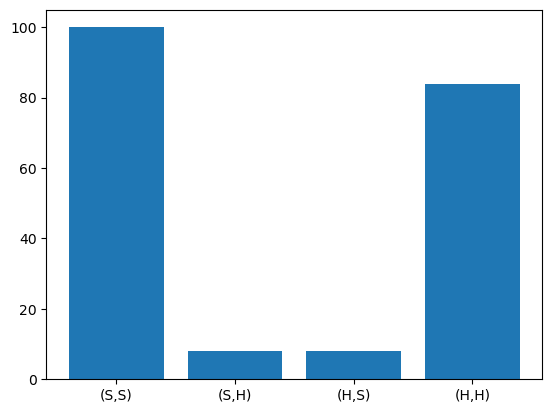

In [47]:
# Visualize the results. Don't modify. 
plot_results(history_P1_action, history_P2_action)

| Question | Response | 
|------|------|
|Where do agents get spend most of their time? | Choose one (leave your choice here and remove the other two choices): 
* Roughly 50-50 between (S,S) and (H,H)

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".